In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

# from scipy.stats import binned_statistic_2d
# from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.cm as cm

# from abacusnbody.analysis.tsc import tsc_parallel
import time

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Import packages

sys.path.append('../src/')
# from filter_utils import *
from SZstacker import SZMapStacker # type: ignore
from stacker import SimulationStacker
from loadIO import load_data    
from utils import fft_smoothed_map, gaussian_smoothed_map

# sys.path.append('../../illustrisPython/')
import illustris_python as il # type: ignore

import yaml
import argparse
from pathlib import Path
import glob

In [2]:
stacker = SZMapStacker('TNG300-1', 67, z=0.5,)

In [3]:
folderPath = stacker.snapPath(stacker.simType, pathOnly=True)
snaps = glob.glob(folderPath + 'snap_*.hdf5')
snap = snaps[0]

In [4]:
DM_dict = stacker.loadSubset('DM', snapPath=snap, keys=['Coordinates', 'Masses', 'Velocities', 'ParticleIDs'])

gas_dict = stacker.loadSubset('gas', snapPath=snap, keys=['Coordinates', 'Masses', 'Velocities', 'ElectronAbundance', 'InternalEnergy', 'Density', 'ParticleIDs'])

In [10]:
DM_dict['ParticleIDs'].shape

(25829857,)

In [9]:
gas_dict['ParticleIDs'].shape

(24582504,)

In [15]:
print(gas_dict['ElectronAbundance'].mean())
print(np.median(gas_dict['ElectronAbundance']))

1.1578155
1.1578009


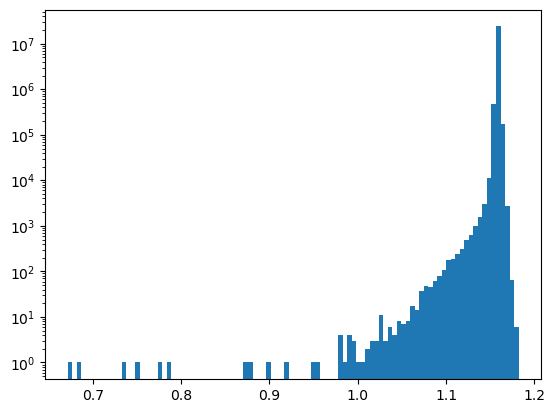

In [13]:
plt.hist(gas_dict['ElectronAbundance'], bins=100)
plt.yscale('log')
plt.show()